In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc dữ liệu
data = pd.read_csv('../datas/train_div10.csv')
data_test = pd.read_csv('../datas/test_div10.csv')

In [2]:
import sys
sys.path.append('../extraction_until')  

from extraction_until import (
    create_training_data,
    calculate_accelerometer_features,
    calculate_accelerometer_fft_features,
    create_training_data_NN_like_micro
)

x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=10, step_size=5)



x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=10, step_size=5)


In [3]:
features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=10)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=10)

c:\Users\ADMIN\OneDrive\Máy tính\Master_2024\new_sleep_posture_2025\train\../extraction_until\extraction_until.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['x_skewness'] = [stats.skew(x) for x in x_list]
c:\Users\ADMIN\OneDrive\Máy tính\Master_2024\new_sleep_posture_2025\train\../extraction_until\extraction_until.py:103: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['y_skewness'] = [stats.skew(y) for y in y_list]
c:\Users\ADMIN\OneDrive\Máy tính\Master_2024\new_sleep_posture_2025\train\../extraction_until\extraction_until.py:104: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  X_train['z_s

In [4]:
features = features[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


features_test = features_test[["z_median","z_mean","x_mean","x_energy", "z_pos_count",
                            "z_neg_count","x_median", 'z_energy', 'avg_result_accl',
                            'x_neg_count', 'z_std', 'x_pos_count',"y_energy","y_mean","sma", 'y_median'
                            ]]


In [5]:
features_all = pd.concat([features ], axis=1)
features_all_test = pd.concat([features_test], axis=1)

In [6]:
# Kiểm tra có bao nhiêu giá trị NaN
print("🔍 Số NaN trong mỗi cột:")
print(features_all.isna().sum().sort_values(ascending=False).head(10))

🔍 Số NaN trong mỗi cột:
z_median           0
z_mean             0
x_mean             0
x_energy           0
z_pos_count        0
z_neg_count        0
x_median           0
z_energy           0
avg_result_accl    0
x_neg_count        0
dtype: int64


In [7]:
features_all = features_all.fillna(features_all.mean())
features_all_test = features_all_test.fillna(features_all_test.mean())

 Training Random Forest (optimized)...

 Random Forest Evaluation Results
 Training Accuracy: 1.0000
 Validation Accuracy: 1.0000
 Test Accuracy: 0.9952

--- Validation Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1929
           2       1.00      1.00      1.00      1431
           3       1.00      1.00      1.00      1507
           4       1.00      1.00      1.00      1445

    accuracy                           1.00      6312
   macro avg       1.00      1.00      1.00      6312
weighted avg       1.00      1.00      1.00      6312


--- Test Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5775
           2       0.99      1.00      0.99      1618
           3       1.00      1.00      1.00      4870
           4       0.99      0.97      0.98       486

    accuracy                           1.00     12749
   macro avg       0.99      0.99     

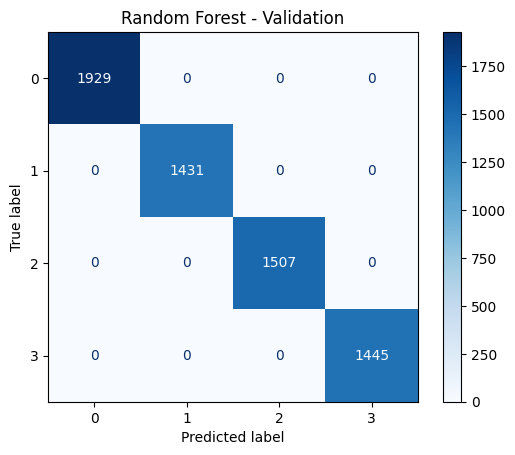

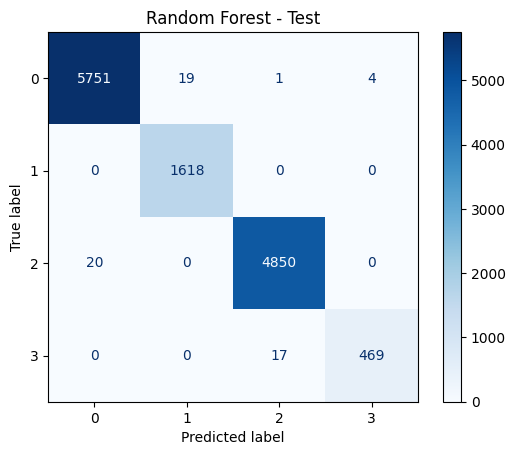

In [8]:
from models import train_RF
modelRF = train_RF(features_all, features_all_test, train_labels, train_labels_test)


 Training Logistic Regression (optimized)...


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.004455139519580936. Increase the number of iterations.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\optimize.py:319: ConvergenceWarning: newton-cg failed to converge at loss = 0.0044514509336827214. Increase the number of iterations.
  warnings.warn(



 Logistic Regression Evaluation Results
 Training Accuracy: 0.9997
 Validation Accuracy: 1.0000
 Test Accuracy: 0.9870

--- Validation Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1929
           2       1.00      1.00      1.00      1431
           3       1.00      1.00      1.00      1507
           4       1.00      1.00      1.00      1445

    accuracy                           1.00      6312
   macro avg       1.00      1.00      1.00      6312
weighted avg       1.00      1.00      1.00      6312


--- Test Report ---
              precision    recall  f1-score   support

           1       1.00      0.98      0.99      5775
           2       0.93      1.00      0.96      1618
           3       1.00      1.00      1.00      4870
           4       0.99      0.97      0.98       486

    accuracy                           0.99     12749
   macro avg       0.98      0.99      0.98     12749
weighted avg     

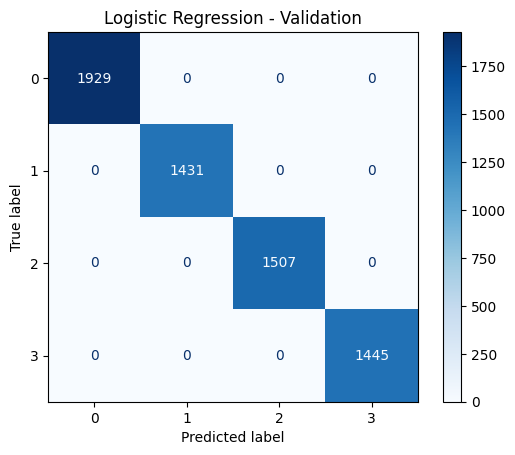

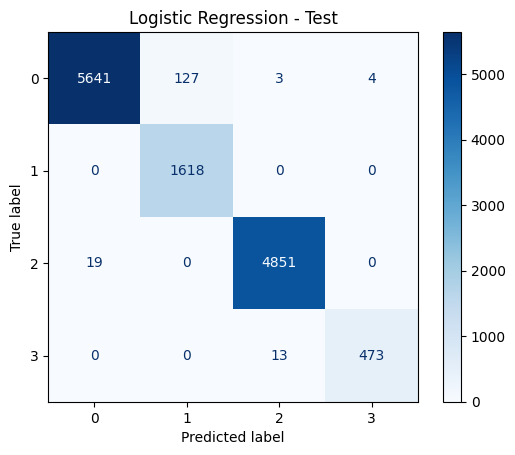

In [9]:
from models import train_LR
modelLR, scalerLr = train_LR(features_all, features_all_test, train_labels, train_labels_test)

In [10]:
import joblib
def export_model_parameters(model, scaler):
    print("\n===== Model Parameters (for Arduino) =====")
    np.set_printoptions(suppress=True, precision=5, linewidth=200)

    # Weights
    print("\nconst float weights[NUM_CLASSES][NUM_FEATURES] = {")
    for class_weights in model.coef_:
        weight_str = ', '.join([f"{w: .5f}" for w in class_weights])
        print(f"  {{ {weight_str} }},")
    print("};")

    # Biases
    biases = ', '.join([f"{b: .5f}" for b in model.intercept_])
    print("\nconst float biases[NUM_CLASSES] = {")
    print(f"  {biases}")
    print("};")

    # Min values
    min_vals = ', '.join([f"{v: .5f}" for v in scaler.data_min_])
    print("\nconst float min_vals[NUM_FEATURES] = {")
    print(f"  {min_vals}")
    print("};")

    # Max values
    max_vals = ', '.join([f"{v: .5f}" for v in scaler.data_max_])
    print("\nconst float max_vals[NUM_FEATURES] = {")
    print(f"  {max_vals}")
    print("};")

    # Scale values
    scales = ', '.join([f"{v: .5f}" for v in scaler.scale_])
    print("\nconst float scale[NUM_FEATURES] = {")
    print(f"  {scales}")
    print("};")
    # Save model
joblib.dump(modelLR, 'onlyLR_minmax.dat')
joblib.dump(scalerLr, 'onlyScaler_minmax.dat')
print("[INFO] Model saved to onlyLR_minmax.dat and onlyScaler_minmax.dat")

    # Export weights for Arduino
export_model_parameters(modelLR, scalerLr)


[INFO] Model saved to onlyLR_minmax.dat and onlyScaler_minmax.dat

===== Model Parameters (for Arduino) =====

const float weights[NUM_CLASSES][NUM_FEATURES] = {
  {  6.59163,  6.98796, -0.23697, -19.91177,  2.03574, -2.37510,  0.09835,  9.88232, -6.72422,  0.36456,  2.26066, -0.82085,  11.76201,  2.07622, -5.97882,  1.33864 },
  {  3.03913,  2.96162,  10.83039,  12.74561,  3.72666, -4.39413,  10.18027, -11.35268,  1.98663, -3.45073, -0.45215,  2.82482, -3.12435, -2.62663,  1.65702, -2.33143 },
  {  2.29614,  2.17533, -11.67315,  12.70060, -0.47019, -0.16596, -11.44951, -5.57496,  3.76495,  1.79044, -0.85308, -2.42538, -9.81070, -1.82736,  7.98619, -1.55025 },
  { -7.58992, -7.64906,  0.73872, -10.22068, -3.24397,  3.23094,  0.76508,  9.51550, -2.73674, -1.80651, -0.47947,  1.75091,  0.71460,  0.81978,  0.25712,  0.72411 },
};

const float biases[NUM_CLASSES] = {
  -12.75730, -19.85388, -1.24971, -0.05602
};

const float min_vals[NUM_FEATURES] = {
  -1.00500, -1.00510, -1.02430,  0.000

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


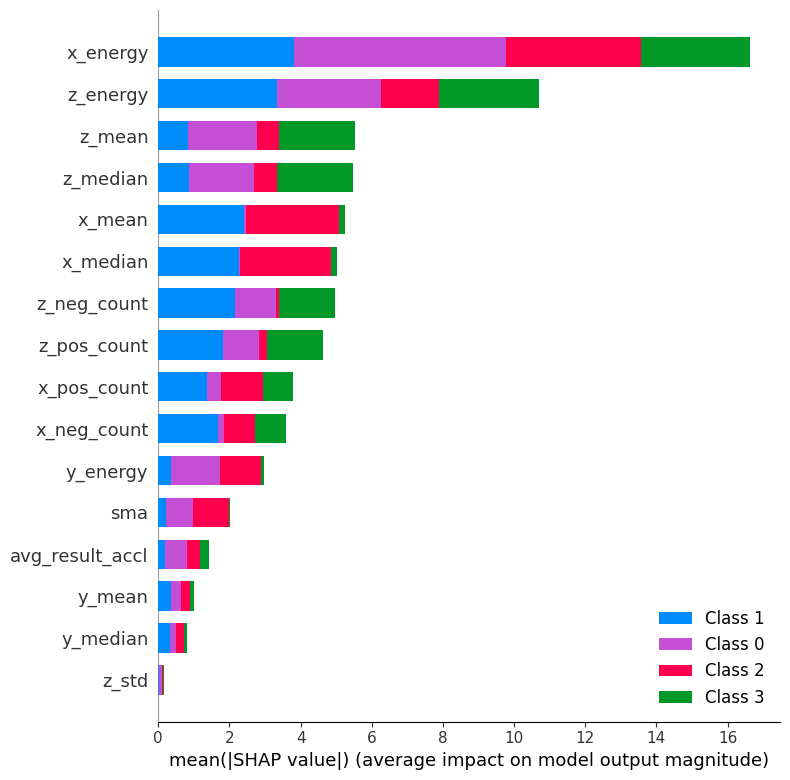

In [11]:
import shap
import pandas as pd

# ⚙️ Bước 1: Đảm bảo features_all là DataFrame có tên cột
# (bạn đã làm đúng ở trên với features và features_fft)
# ⚠️ Tuy nhiên sau khi chuẩn hóa, cần gắn lại tên cột:
X_scaled = scalerLr.transform(features_all)
X_scaled = pd.DataFrame(X_scaled, columns=features_all.columns)

# ⚙️ Bước 2: Tạo LinearExplainer
explainer = shap.LinearExplainer(modelLR, X_scaled, feature_names=features_all.columns)

# ⚙️ Bước 3: Tính SHAP values
shap_values = explainer.shap_values(X_scaled)

# ⚙️ Bước 4: Vẽ biểu đồ SHAP
shap.summary_plot(shap_values, X_scaled, plot_type="bar", max_display=50)

💡 Training SVM (optimized)...

 Support Vector Machine Evaluation Results
 Training Accuracy: 1.0000
 Validation Accuracy: 1.0000
 Test Accuracy: 0.9805

--- Validation Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1929
           2       1.00      1.00      1.00      1431
           3       1.00      1.00      1.00      1507
           4       1.00      1.00      1.00      1445

    accuracy                           1.00      6312
   macro avg       1.00      1.00      1.00      6312
weighted avg       1.00      1.00      1.00      6312


--- Test Report ---
              precision    recall  f1-score   support

           1       1.00      0.96      0.98      5775
           2       0.95      1.00      0.98      1618
           3       0.97      1.00      0.98      4870
           4       0.99      0.98      0.99       486

    accuracy                           0.98     12749
   macro avg       0.98      0.98     

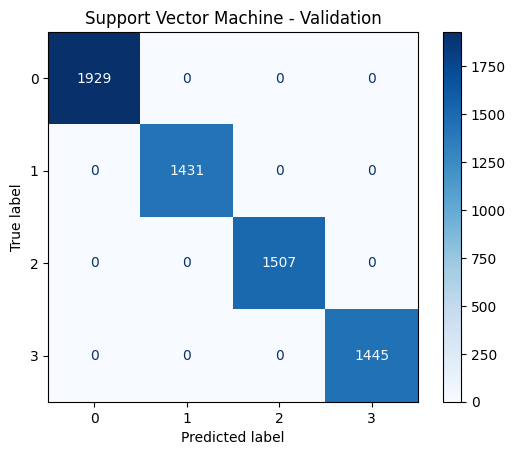

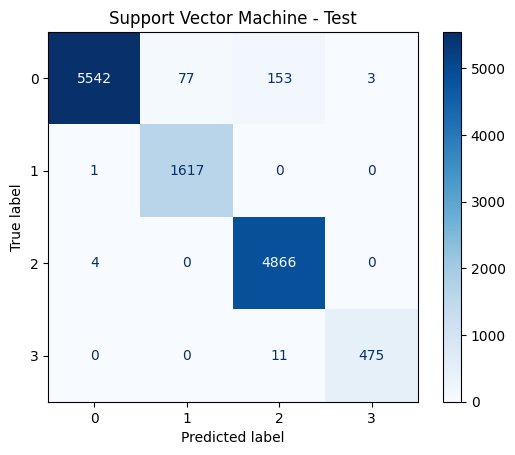

In [12]:
from models import train_SVM
modelSVM, scalerSVM = train_SVM(features_all, features_all_test, train_labels, train_labels_test)

🔥 Training Gradient Boosting (optimized)...

 Gradient Boosting Evaluation Results
 Training Accuracy: 0.9999
 Validation Accuracy: 1.0000
 Test Accuracy: 0.9950

--- Validation Report ---
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1929
           2       1.00      1.00      1.00      1431
           3       1.00      1.00      1.00      1507
           4       1.00      1.00      1.00      1445

    accuracy                           1.00      6312
   macro avg       1.00      1.00      1.00      6312
weighted avg       1.00      1.00      1.00      6312


--- Test Report ---
              precision    recall  f1-score   support

           1       1.00      0.99      1.00      5775
           2       0.99      1.00      0.99      1618
           3       1.00      1.00      1.00      4870
           4       0.99      0.98      0.99       486

    accuracy                           0.99     12749
   macro avg       0.99      

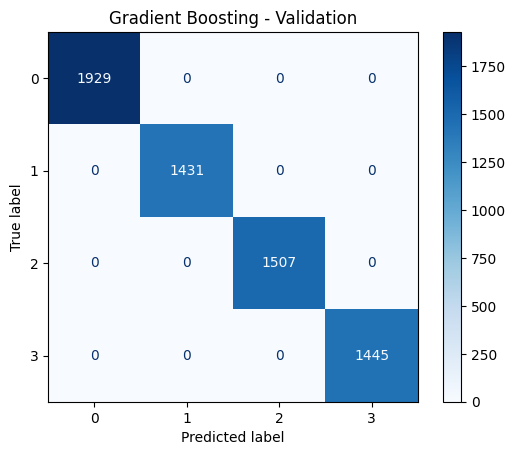

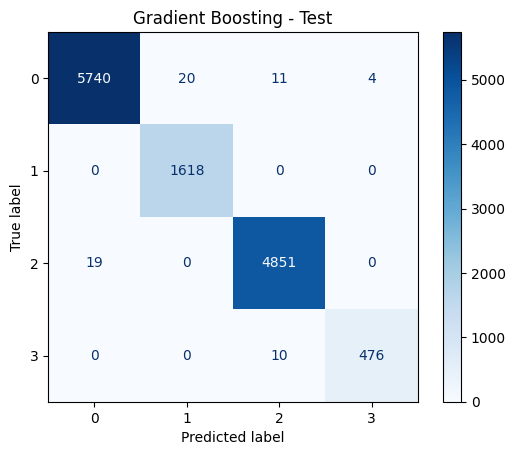

In [13]:
from models import train_GB
modelGB, scalerGB = train_GB(features_all, features_all_test, train_labels, train_labels_test)


In [14]:
from optimation import get_model_size_kb

get_model_size_kb(modelRF, None, "RandomForest")
get_model_size_kb(modelLR, scalerLr, "LogisticRegression")
get_model_size_kb(modelSVM, scalerSVM, "SVM")
get_model_size_kb(modelGB, None, "GradientBoosting")




📦 RandomForest: Model = 74.63 KB | Scaler = 0.00 KB | Total = 74.63 KB
🌲  → Tổng số nút trong mô hình cây: 690
----------------------------------------------------------------------
📦 LogisticRegression: Model = 1.40 KB | Scaler = 1.69 KB | Total = 3.09 KB
🔢  → Số tham số huấn luyện: 68
----------------------------------------------------------------------
📦 SVM: Model = 11.09 KB | Scaler = 1.40 KB | Total = 12.49 KB
🔢  → Số tham số huấn luyện: 102
----------------------------------------------------------------------
📦 GradientBoosting: Model = 102.29 KB | Scaler = 0.00 KB | Total = 102.29 KB
🌲  → Tổng số nút trong mô hình cây: 1144
----------------------------------------------------------------------


102.2890625